## 3. Use sklearn. datasets import load_iris use k-neighbour classifier to classify the three flowers to setosa, vesicolor and Virginica.

#### import basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### import the dataset and take independent and dependent variables separately

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris.data[:,:4]     #independent variables
Y = iris.target          #dependent variable

#### split the dataset into train set and test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

#### scale the features

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

#### train the model and fit the training set and compare with test set

for neighbor =  1 accuracy :  0.8157894736842105
for neighbor =  2 accuracy :  0.8947368421052632
for neighbor =  3 accuracy :  0.8947368421052632
for neighbor =  4 accuracy :  0.9473684210526315
for neighbor =  5 accuracy :  0.9473684210526315
for neighbor =  6 accuracy :  0.9473684210526315
for neighbor =  7 accuracy :  0.9473684210526315
for neighbor =  8 accuracy :  0.9473684210526315
for neighbor =  9 accuracy :  0.9210526315789473
for neighbor =  10 accuracy :  0.9736842105263158
for neighbor =  11 accuracy :  0.8947368421052632
for neighbor =  12 accuracy :  0.9473684210526315
for neighbor =  13 accuracy :  0.8421052631578947
for neighbor =  14 accuracy :  0.8421052631578947


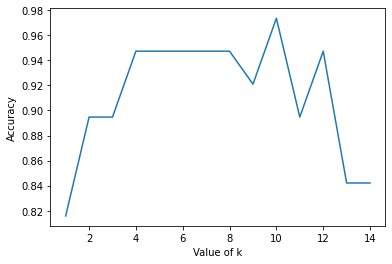

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

range_k = range(1,15)          #for checking no. of neighbors(k) from 1 to 14
scores_list = []               #take an empty list for storing the accuracy for each classifer of k=1 to 14

for k in range_k:
    classifier = KNeighborsClassifier(n_neighbors=k)              #parameter : n_neighbors = no of neighbors
    classifier.fit(X_train,Y_train)                               #fit the training set
    Y_pred = classifier.predict(X_test)                           #predict the values for test set
    scores_list.append(metrics.accuracy_score(Y_test,Y_pred))     #append the accuracy value in the list
    print("for neighbor = ",k,"accuracy : ",metrics.accuracy_score(Y_test,Y_pred))
    
#plot the k value vs accuracy
plt.plot(range_k,scores_list)
plt.xlabel("Value of k")
plt.ylabel("Accuracy")
plt.show()

As for neighbor = 10 , the accuracy is maximum so we make our final model with no. of neighbors = 10

#### final model

In [6]:
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train,Y_train)
Y_pred = classifier.predict(X_test)
classes = {0:'setosa', 1:'versicolor', 2:'virginicia'}

#### find classification report and confusion matrix

In [7]:
result = metrics.confusion_matrix(Y_test,Y_pred)
print("Confusion Matrix:\n",result)
result1 = metrics.classification_report(Y_test,Y_pred)
print("Classification Report:\n",result1)

Confusion Matrix:
 [[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



#### predict the result

In [8]:
x_new = [[1,1,1,1],[4,3,1.3,0.2]]         #predict the results for two randomly taken values
y_predict = classifier.predict(x_new)
print(classes[y_predict[0]])
print(classes[y_predict[1]])

virginicia
virginicia
